### Regresion lineal simple en Python
#### El paquete statsmodel para regresion lineal

In [2]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv('data/Advertising.csv')

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
import statsmodels.formula.api as smf

In [6]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

In [7]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo seria 
Sales = 7.032594 + 0.047537*TV

In [8]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [9]:
lm.rsquared

np.float64(0.611875050850071)

In [10]:
lm.rsquared_adj

np.float64(0.6099148238341623)

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        12:34:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))

In [13]:
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [14]:
import matplotlib.pyplot as plt

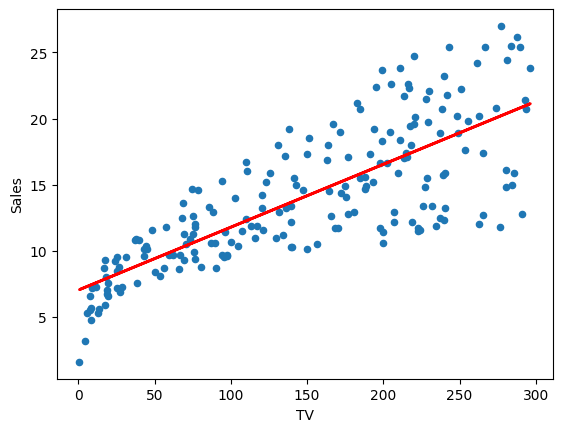

In [15]:
%matplotlib inline
data.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred, c='red', linewidth=2)

In [16]:
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"]

In [17]:
data["RSE"] = (data["Sales"] - data["sales_pred"])**2

In [18]:
SSD = sum(data["RSE"])

In [19]:
RSE = np.sqrt(SSD/(len(data) - 2)) #Error estandar residual

In [20]:
RSE

np.float64(3.2586563692380976)

In [21]:
sales_m = np.mean(data["Sales"])


In [22]:
sales_m # Numero de ventas promedio

np.float64(14.0225)

In [23]:
error = RSE/sales_m  #Error promedio

In [24]:
error #Error promedio del 23%, el modelo no es capaz de explicar el 23% de las ventas

np.float64(0.23238768901680137)

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

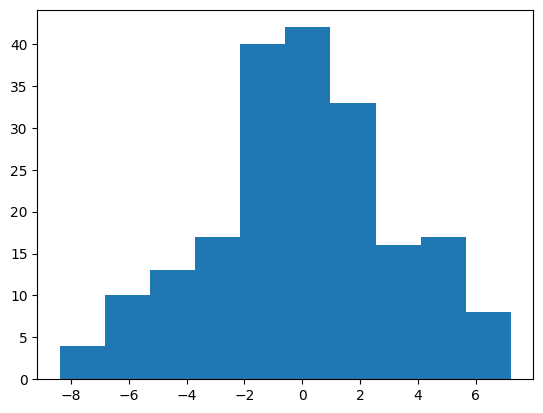

In [25]:
plt.hist(data["Sales"] - data["sales_pred"])

## Regresión lineal múltiple en Python

#### El paquete statsmodel para regresión multiple

- Sales ~ TV
- Sales ~ Newspaper
- Sales ~ Radio
- Sales ~ TV+Newspaper 
- Sales ~ TV+Radio
- Sales ~ Newspaper+Radio
- Sales ~ TV+Newspaper+Radio

In [ ]:
#Añadir el newspaper al modelo existente
lm2 = smf.ols(formula='Sales ~ TV + Newspaper', data=data).fit()
lm2.summary()

In [27]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [28]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

El modelo que predeciria las ventas quedaria como 

Sales = 5.774948 + 0.046901*TV + 0.044219*Newspaper

In [29]:
lm2.rsquared

np.float64(0.6458354938293271)

In [30]:
lm2.rsquared_adj

np.float64(0.6422399150864777)

In [31]:
sales_pred = lm2.predict(pd.DataFrame(data[['TV','Newspaper']]))

In [32]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [33]:
SSD = sum((data["Sales"] - sales_pred)**2)

In [34]:
SSD

1918.5618118968275

In [35]:
RSE = np.sqrt(SSD/(len(data) -3)) #Error estandar residual

In [36]:
RSE

np.float64(3.1207198602528856)

In [39]:
error = RSE/sales_m  #Error promedio
error #Error promedio del 22.25%, el modelo no es capaz de explicar el 22.25% de las ventas

np.float64(0.22255089037282122)

In [45]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           4.83e-98
Time:                        14:41:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Añadir la radio al modelo existente
lm3 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()

In [53]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           4.83e-98
Time:                        14:46:35   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
sales_pred = lm3.predict(pd.DataFrame(data[['TV','Radio']]))
SSD = sum((data["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD/(len(data) -3)) #Error estandar residual


In [57]:
RSE

np.float64(1.681360912508001)

In [ ]:
RSE/sales_m #Solo deja de explicar cerca del 12% de las ventas, por separado ninguno pudiera predecir igual de bien

np.float64(0.1199045043685506)

In [59]:
#Añadir la radio al modelo existente
lm4 = smf.ols(formula='Sales~TV+Radio+Newspaper', data=data).fit()

In [60]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.58e-96
Time:                        14:50:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
sales_pred = lm3.predict(data[['TV','Radio', 'Newspaper']])
SSD = sum((data["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD/(len(data) -4)) #Error estandar residual

In [63]:
RSE

np.float64(1.6856446415208186)

In [65]:
RSE/sales_m #Ha subido un poco el error, no mejora el modelo

np.float64(0.12020999404676902)

### Multicolinealidad
### Factor Inflacion de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlacion moderada y se pueden quedar en el modelo
* VIF > 5 : Las variables estan altamente correlacionadas y deben desaparecer del modelo

In [68]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula='Newspaper ~ TV + Radio', data=data).fit()   
rsqueared = lm_n.rsquared
vif_newspaper = 1/(1 - rsqueared)
vif_newspaper

np.float64(1.1451873787239288)

In [70]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula='TV ~ Newspaper + Radio', data=data).fit()
rsquared_tv = lm_tv.rsquared
vif_tv = 1/(1 - rsquared_tv)
vif_tv

np.float64(1.00461078493965)

In [71]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula='Radio ~ TV + Newspaper', data=data).fit()
rsquared_r = lm_r.rsquared
vif_r = 1/(1 - rsquared_r)
vif_r

np.float64(1.1449519171055353)

In [72]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           4.83e-98
Time:                        17:26:00   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""